<a href="https://colab.research.google.com/github/ankitpatil24/mlproject/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Algorithm implementation

In [ ]:
# import pandas as pd
import pandas as pd

# list of strings
data = [['Sunny','humid','yes','Yes'],
 ['Sunny','hot','yes','Yes'],
  ['Rainy','humid','yes','No'],
   ['Sunny','hot','no','No'],
 ['Outcast','cold','yes','No']]

# Calling DataFrame constructor on list
# with indices and columns specified
df = pd.DataFrame(data, index =['1', '2', '3', '4','5'],
                  columns =['Weather','Temp','Time','Play'])
df


,Weather,Temp,Time,Play
1,Sunny,humid,yes,Yes
2,Sunny,hot,yes,Yes
3,Rainy,humid,yes,No
4,Sunny,hot,no,No
5,Outcast,cold,yes,No


In [ ]:
df['Weather']=df['Weather'].replace({'Sunny':1,'Rainy':2,'Outcast':3})
df['Temp']=df['Temp'].replace({'humid':1,'hot':2,'cold':3})
df['Time']=df['Time'].replace({'yes':1,'no':2})
df

,Weather,Temp,Time,Play
1,1,1,1,Yes
2,1,2,1,Yes
3,2,1,1,No
4,1,2,2,No
5,3,3,1,No


In [ ]:
import numpy as np
X=np.array(df[['Weather','Temp','Time']])
y=np.array(df['Play'])
X,y

(array([[1, 1, 1],
        [1, 2, 1],
        [2, 1, 1],
        [1, 2, 2],
        [3, 3, 1]]),
 array(['Yes', 'Yes', 'No', 'No', 'No'], dtype=object))

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- feature_2 <= 1.50
|   |   |--- class: Yes
|   |--- feature_2 >  1.50
|   |   |--- class: No
|--- feature_0 >  1.50
|   |--- class: No



In [ ]:
df.columns[:-1]

Index(['Weather', 'Temp', 'Time'], dtype='object')

[Text(0.6, 0.8333333333333334, 'Weather <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Yes'),
 Text(0.4, 0.5, 'Time <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = No'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes')]

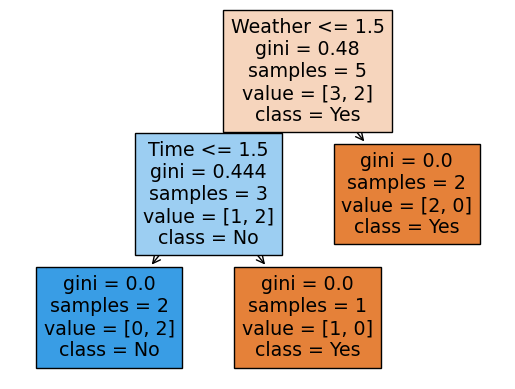

In [ ]:
tree.plot_tree(clf,
                   feature_names=df.columns[:-1],
                   class_names=['Yes','No'],
                   filled=True)

[Text(0.6, 0.8333333333333334, 'Weather <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = Yes'),
 Text(0.4, 0.5, 'Time <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = No'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes')]

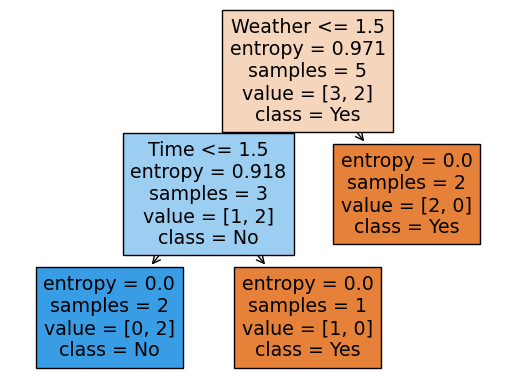

In [ ]:
#criterion = "entropy"
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X, y)
tree.plot_tree(clf,
                   feature_names=df.columns[:-1],
                   class_names=['Yes','No'],
                   filled=True)

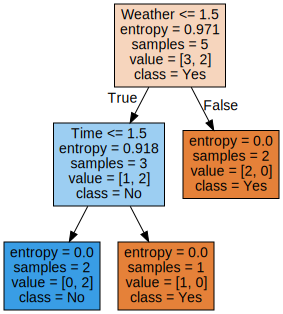

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df.columns[:-1],
                                class_names=['Yes','No'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
df_d=pd.read_csv('/content/diabetes.csv')
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_d.shape

(768, 9)

In [ ]:
import numpy as np
X=np.array(df_d[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']])
Y=np.array(df_d['Outcome'])

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y ,
                                   test_size=0.2,
                                   shuffle=True)


In [ ]:
clf_d = tree.DecisionTreeClassifier()
clf_d = clf_d.fit(X, Y)

In [ ]:
text_representation = tree.export_text(clf_d)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 45.40
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |--- feature_6 <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.67
|   |   |   |   |   |   |--- feature_6 <= 0.69
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  0.69
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_2 <= 53.00
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- feature_6 <= 0.16
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  0.16
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   

[Text(0.479853592519685, 0.9666666666666667, 'Glucose <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]\nclass = 0'),
 Text(0.19888041338582677, 0.9, 'Age <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]\nclass = 0'),
 Text(0.10187007874015748, 0.8333333333333334, 'BMI <= 45.4\ngini = 0.155\nsamples = 271\nvalue = [248, 23]\nclass = 0'),
 Text(0.06791338582677166, 0.7666666666666667, 'BMI <= 30.95\ngini = 0.139\nsamples = 267\nvalue = [247, 20]\nclass = 0'),
 Text(0.023622047244094488, 0.7, 'Pregnancies <= 7.5\ngini = 0.026\nsamples = 151\nvalue = [149, 2]\nclass = 0'),
 Text(0.015748031496062992, 0.6333333333333333, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.013\nsamples = 150\nvalue = [149, 1]\nclass = 0'),
 Text(0.007874015748031496, 0.5666666666666667, 'gini = 0.0\nsamples = 131\nvalue = [131, 0]\nclass = 0'),
 Text(0.023622047244094488, 0.5666666666666667, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.1\nsamples = 19\nvalue = [18, 1]\nclass = 0'),
 Text(0.015748031

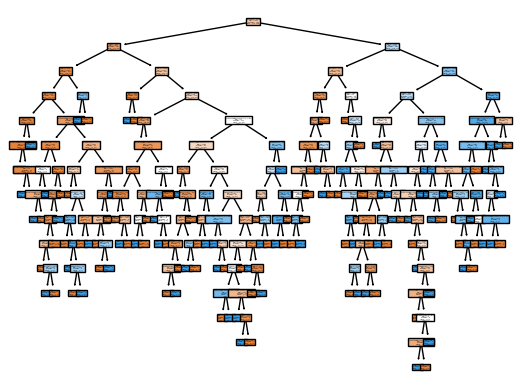

In [ ]:
tree.plot_tree(clf_d,
                   feature_names=df_d.columns[:-1],
                   class_names=['0','1'],
                   filled=True)

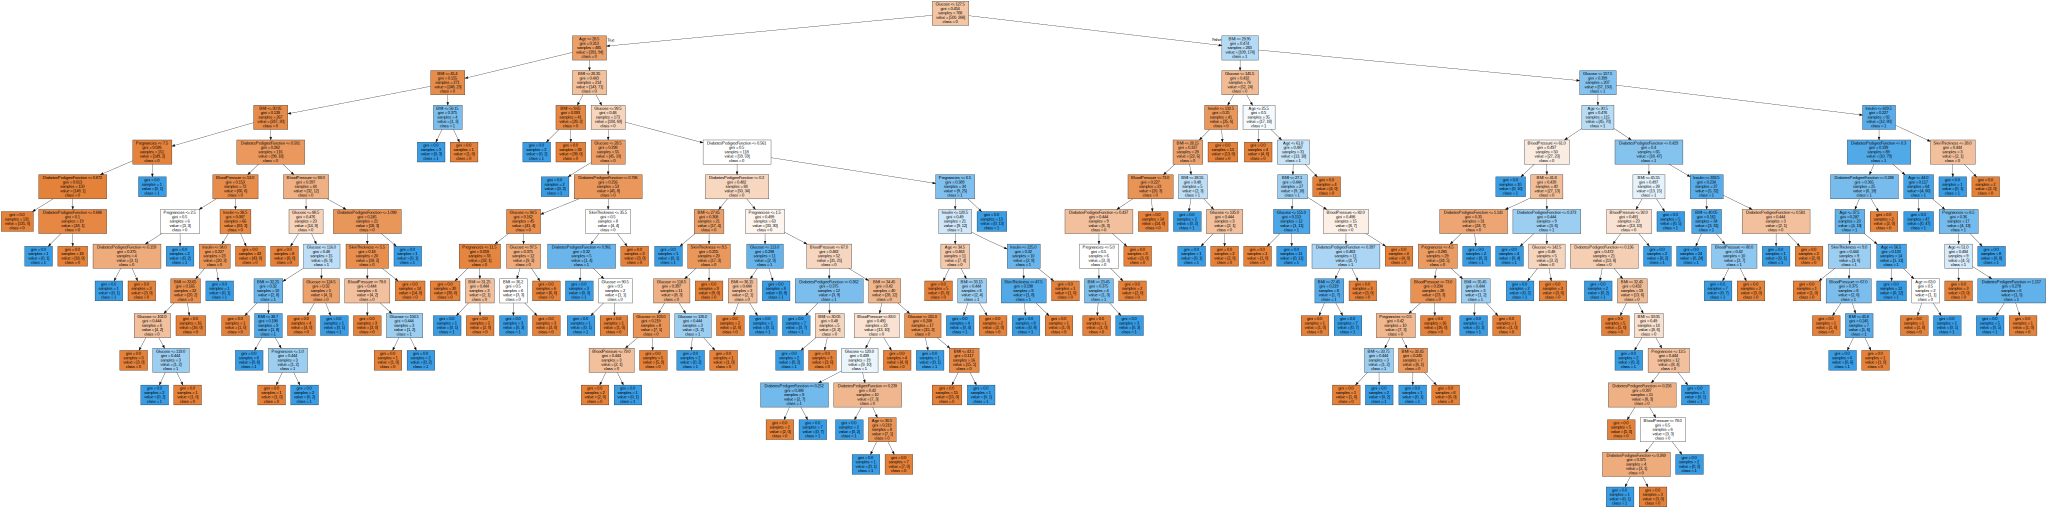

In [ ]:
dot_data = tree.export_graphviz(clf_d, out_file=None,
                                feature_names=df_d.columns[:-1],
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
op=clf_d.predict([[6,130,70,32,0,30.6,0.450,40]])
op

array([0])

In [ ]:
op=clf_d.predict(X_test)
op

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, op)
score

1.0

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, op))

Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

    print("Report : ",
    classification_report(y_test, y_pred))

In [ ]:
cal_accuracy(y_test, op)

Confusion Matrix:  [[72  0]
 [ 0 48]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680